In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit
from scipy import stats
from scipy import optimize

In [2]:
Excel=pd.ExcelFile("Datos/Datos_laser_rojo.xlsx")
Excel.sheet_names

['Dos_rendijas', 'Una rendija_izquierda', 'Una_rendija_derecha']

In [11]:
datos=pd.read_excel(Excel,sheet_name='Dos_rendijas')
datos=datos.drop("ruido en 0", axis=1)
datos=datos.sort_values("Distancia")
datos=datos[np.abs(datos.Distancia)<2].reset_index(drop=True)
datos.Distancia=datos.Distancia/1000
datos.Distancia.iloc[np.abs(datos.Distancia).values.argmin()]=1E-6
#datos.Distancia.iloc[np.argmin(np.abs(datos.Distancia))]=1E-6
datos["Error"]=0.1/2.0 *np.ones(len(datos))
datos["Error_x"]=0.1/(2000)

In [4]:
def Intensidad_difraccion(alpha):
    return (np.sin(alpha)/alpha)**2
def function_alpha(y_pos,wave_length):
    return np.pi*1.0*10**(-4)/(wave_length)*y_pos
def Intensidad_interferencia(y_pos,wave_length):
    return (np.cos((np.pi*35.6*10**(-5)*y_pos)/(wave_length)))**2

def modelo_interferencia(distancia,d,wave_length):
    #wave_length=575*10**(-9)
    #d=35.6*10**(-5)
    a=1.0*10**(-4)
    I_0=1.1
    alpha=np.pi*a*distancia/wave_length
    difraccion= (np.sin(alpha)/alpha)**2
    interferencia=(np.cos((np.pi*d*distancia)/(wave_length)))**2
    return I_0*difraccion*interferencia

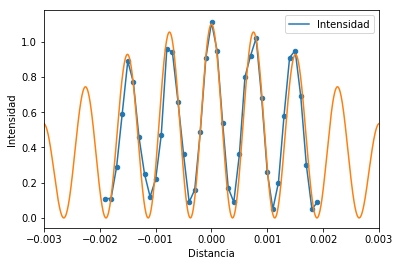

In [5]:
y=np.linspace(-0.003,0.003,1000)
ax=datos.plot("Distancia","Intensidad",xlim=(-0.003,0.003))
datos.plot.scatter("Distancia","Intensidad",ax=ax)
plt.plot(y,modelo_interferencia(y,88.6*10**(-5),670*10**(-9)))

In [19]:
p0 = [67.6*10**(-5),670*10**(-9)]
popt, pcov = curve_fit(modelo_interferencia, xdata=np.array(datos.Distancia), ydata=np.array(datos.Intensidad), p0=p0,sigma=np.array(datos.Error),absolute_sigma= True) 
perr = np.sqrt(np.diag(pcov))

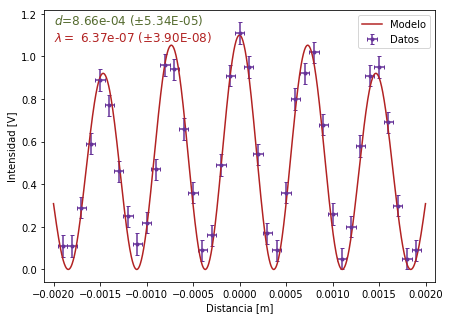

In [20]:
plt.figure(figsize=(7,5))
y=np.linspace(-2.0/1000,2.0/1000,1000)
#datos.plot("Distancia","Intensidad",kind="scatter",s=7,figsize=(7,5),c="k",xlim=(-2.1/1000,2.1/1000),ylim=(-0.05,1.3),yerr="Error",xerr="Error_x")
plt.errorbar(datos.Distancia,datos.Intensidad,fmt="o",yerr=np.array(datos.Error),xerr=np.array(datos.Error_x),label="Datos",color="rebeccapurple",ms=3,capsize=2)
plt.plot(y,modelo_interferencia(y,popt[0],popt[1]),label="Modelo",color="firebrick")
plt.legend(loc="best")
plt.text(np.min(y),1.15,r"$d$={:0.2e} ($\pm${:0.2E})".format(popt[0],perr[0]),fontsize=12,color="darkolivegreen")
plt.text(np.min(y),1.2-0.13,r"$\lambda=$ {:0.2e} ($\pm${:0.2E})".format(popt[1],perr[1]),fontsize=12,color="firebrick")
plt.xlabel("Distancia [m]")
plt.ylabel("Intensidad [V]")
plt.xlim(-2.1/1000,2.1/1000)
plt.ylim=(-0.05,3.5)
plt.savefig("Figuras/Interferencia_laserrojo.png")
plt.show()

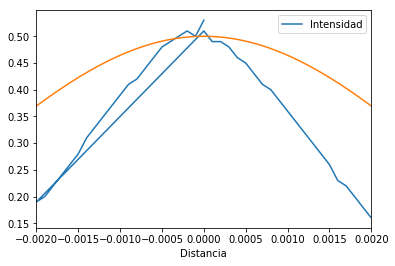

In [22]:
una_rendija=pd.read_excel(Excel,sheet_name='Una_rendija_derecha')
una_rendija["Distancia"]=una_rendija["Distancia"]/1000
una_rendija.plot("Distancia","Intensidad")
y=np.linspace(-0.003,0.003,1000)
alpha=function_alpha(y,670*10**(-9))
plt.plot(y,0.5*Intensidad_difraccion(alpha))

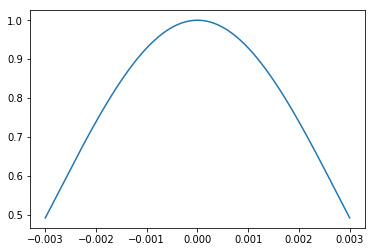

In [15]:
y=np.linspace(-0.003,0.003,1000)
alpha=function_alpha(y,670*10**(-9))
plt.plot(y,Intensidad_difraccion(alpha))